In [21]:
library(tidyverse)
library(ggpmisc)

# Plot 1

In [22]:
# Read CSV file with working hours
# Source: https://stats.oecd.org/Index.aspx?DataSetCode=ANHRS#
df_hours <- read.csv("data_OECD/oecd_stat_hours_worked.csv", header = TRUE,
                     sep = ",")

# Glimpse of data
df_hours %>% glimpse()

Rows: 3,333
Columns: 17
$ COUNTRY               <fct> AUS, AUS, AUS, AUS, AUS, AUS, AUS, AUS, AUS, AUS…
$ Country               <fct> Australia, Australia, Australia, Australia, Aust…
$ EMPSTAT               <fct> TE, TE, TE, TE, TE, TE, TE, TE, TE, TE, TE, TE, …
$ Employment.status     <fct> Total employment, Total employment, Total employ…
$ FREQUENCY             <fct> A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, …
$ Frequency             <fct> Annual, Annual, Annual, Annual, Annual, Annual, …
$ TIME                  <int> 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, …
$ Time                  <int> 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, …
$ Unit.Code             <fct> HOUR, HOUR, HOUR, HOUR, HOUR, HOUR, HOUR, HOUR, …
$ Unit                  <fct> Hours, Hours, Hours, Hours, Hours, Hours, Hours,…
$ PowerCode.Code        <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ PowerCode             <fct> Units, Units, Units, Units, Units, Units, Units,…
$ Reference.Peri

In [23]:
# Show all countries
unique(df_hours$Country)

[1] Australia          Austria            Belgium            Canada            
 [5] Czech Republic     Denmark            Finland            France            
 [9] Germany            Greece             Hungary            Iceland           
[13] Ireland            Italy              Japan              Korea             
[17] Luxembourg         Mexico             Netherlands        New Zealand       
[21] Norway             Poland             Portugal           Slovak Republic   
[25] Spain              Sweden             Switzerland        Turkey            
[29] United Kingdom     West Germany       United States      OECD countries    
[33] Israel             Chile              Slovenia           Estonia           
[37] Russian Federation Lithuania          Latvia             Costa Rica        
[41] Euro area          Romania            Malta              Bulgaria          
[45] Cyprus             Croatia            Colombia           European Union 27 
48 Levels: Australia Austria Belgium Bulgaria Canada Chile ... West Germany

In [24]:
# Show all years
unique(df_hours$Time)

[1] 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
[16] 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
[31] 2015 2016 2017 2018 2019 2020 1970 1971 1972 1973 1974 1975 1976 1977 1978
[46] 1979 1980 1981 1982 1983 1984 1961 1962 1963 1964 1965 1966 1967 1968 1969
[61] 1960 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959

In [25]:
# Show all employment status
unique(df_hours$Employment.status )

[1] Total employment     Dependent employment
Levels: Dependent employment Total employment

In [26]:
# Specify countries
countries <- c('Belgium', 'Canada', 'France', 'Germany',
               'Italy', 'Netherlands', 'Norway', 'Sweden',
               'United Kingdom', 'United States')

# Specify years
years <- c(2000:2020)

In [27]:
# Select rows for total employment
df_hours <- df_hours[df_hours$EMPSTAT %in% c('TE'),]

# Selct specific columns
df_hours = df_hours[c('Country', 'Time', 'Value')]

# Rename Value column
colnames(df_hours)[3] = 'Hours_worked'

# Select rows for specific countries
df_hours <- df_hours[df_hours$Country %in% countries,]

# Select rows for specific years
df_hours <- df_hours[df_hours$Time %in% years,]

# Show dimension of dataframe
dim(df_hours)

[1] 210   3

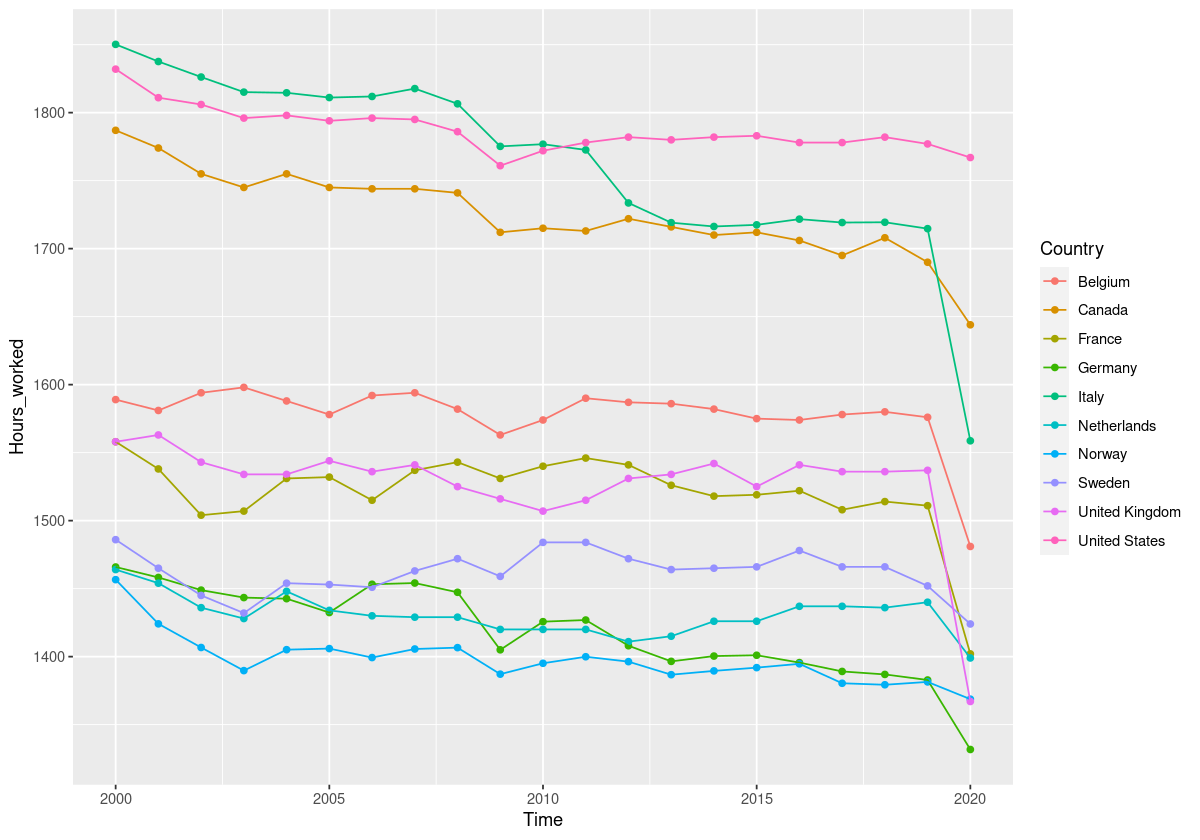

In [28]:
# Change plot size in notebook
options(repr.plot.width=10, repr.plot.height=7)

# Plot time to working hours
ggplot(data=df_hours, aes(x=Time, y=Hours_worked, group=Country)) +
    geom_point(aes(color=Country)) + geom_line(aes(color=Country))

# Plot 2

In [29]:
# Read CSV file with earnings inequalities
# Source: https://stats.oecd.org/Index.aspx?DataSetCode=DEC_I#
df_ratio <- read.csv("data_OECD/oecd_stat_decile_ratios.csv", header = TRUE, sep = ",")

# Glimpse of data
df_ratio %>% glimpse()

Rows: 12,330
Columns: 17
$ COUNTRY               <fct> AUS, AUS, AUS, AUS, AUS, AUS, AUS, AUS, AUS, AUS…
$ Country               <fct> Australia, Australia, Australia, Australia, Aust…
$ SEX                   <fct> MW, MW, MW, MW, MW, MW, MW, MW, MW, MW, MW, MW, …
$ Sex                   <fct> All persons, All persons, All persons, All perso…
$ SERIES                <fct> LPI, LPI, LPI, LPI, LPI, LPI, LPI, LPI, LPI, LPI…
$ Series                <fct> Low Pay Incidence, Low Pay Incidence, Low Pay In…
$ TIME                  <int> 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, …
$ Time                  <int> 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, …
$ Unit.Code             <fct> IDX, IDX, IDX, IDX, IDX, IDX, IDX, IDX, IDX, IDX…
$ Unit                  <fct> Index, Index, Index, Index, Index, Index, Index,…
$ PowerCode.Code        <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ PowerCode             <fct> Units, Units, Units, Units, Units, Units, Units,…
$ Reference.Per

In [30]:
# Show all unit codes
unique(df_ratio$Unit.Code)

[1] IDX    P50P10 P90P10 P90P50       
Levels:  IDX P50P10 P90P10 P90P50

In [31]:
# Show all sexes
unique(df_ratio$SEX)

[1] MW    MEN   WOMEN
Levels: MEN MW WOMEN

In [32]:
# Select rows for P9050 in SERIES column
df_ratio <- df_ratio[df_ratio$SERIES %in% c("P9050"),]

# Select rows for MW in SEX column
df_ratio <- df_ratio[df_ratio$SEX %in% c("MW"),]

# Selct specific columns
df_ratio = df_ratio[c('Country', 'Time', 'Value')]

# Rename column
colnames(df_ratio)[3] = 'P90P50'

# Select rows for specific countries
df_ratio <- df_ratio[df_ratio$Country %in% countries,]

# Select rows for specific years
df_ratio <- df_ratio[df_ratio$Time %in% c(2000:2020),]

# Dimension of data set
dim(df_ratio) 

[1] 159   3

In [33]:
# Delete rows in Hours_worked where P90P50 is missing
df_all <- df_hours[paste(df_hours$Country, df_hours$Time) %in% paste(df_ratio$Country, df_ratio$Time), ]

# Add P90P50
df_all <- cbind(df_all, df_ratio[3])

# Rearange columns
df_all = df_all[, c(1, 2, 4, 3)]

# Dimension of data
dim(df_all)

[1] 159   4

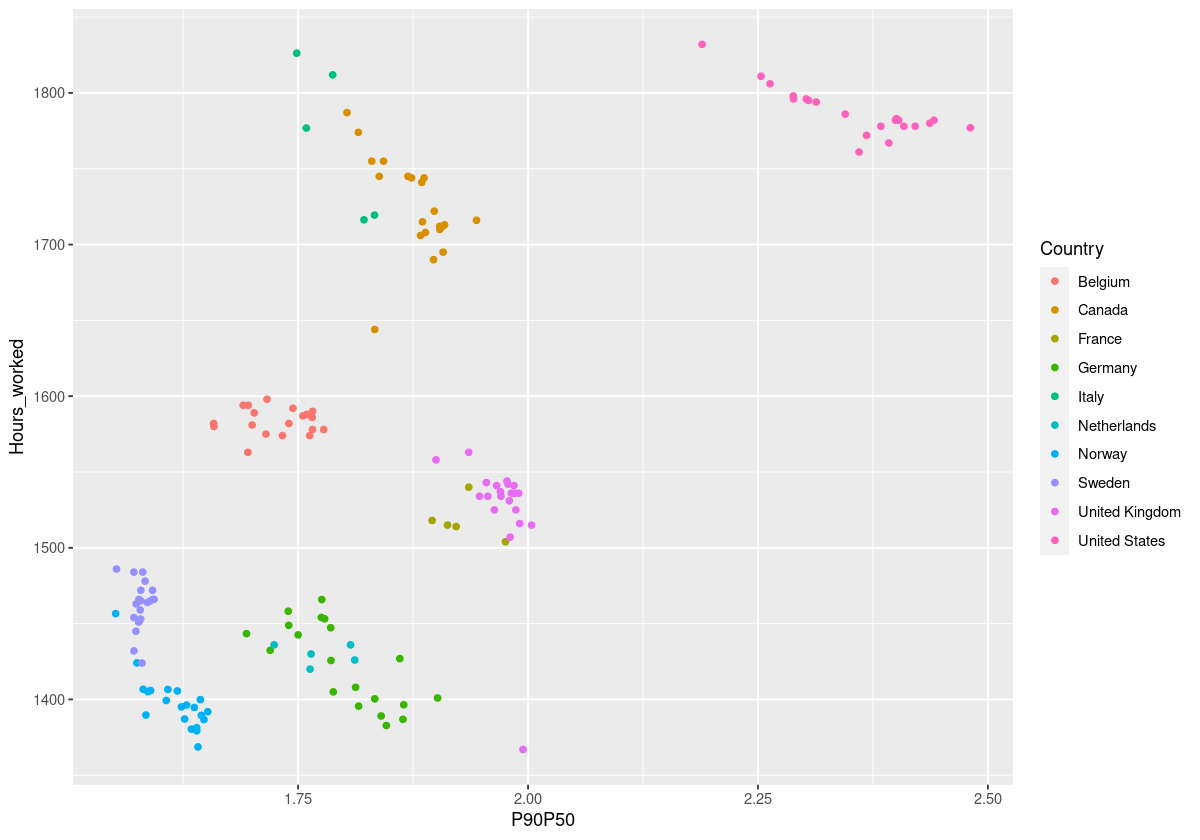

In [34]:
# Plot inequality earning to working hours
ggplot(data=df_all, aes(x=P90P50, y=Hours_worked)) +
    geom_point(aes(colour=Country))

In [35]:
# Create data set with country means
df_means = aggregate(df_all[, 3:4], list(df_all[, 1]), FUN=mean)
df_means

Group.1,P90P50,Hours_worked
<fct>,<dbl>,<dbl>
Belgium,1.726327,1583.421
Canada,1.876436,1725.381
France,1.928205,1518.200
Germany,1.798522,1423.195
Italy,1.789913,1770.120
Netherlands,1.773888,1429.600
Norway,1.617124,1397.648
Sweden,1.578928,1461.952
United Kingdom,1.971270,1526.905


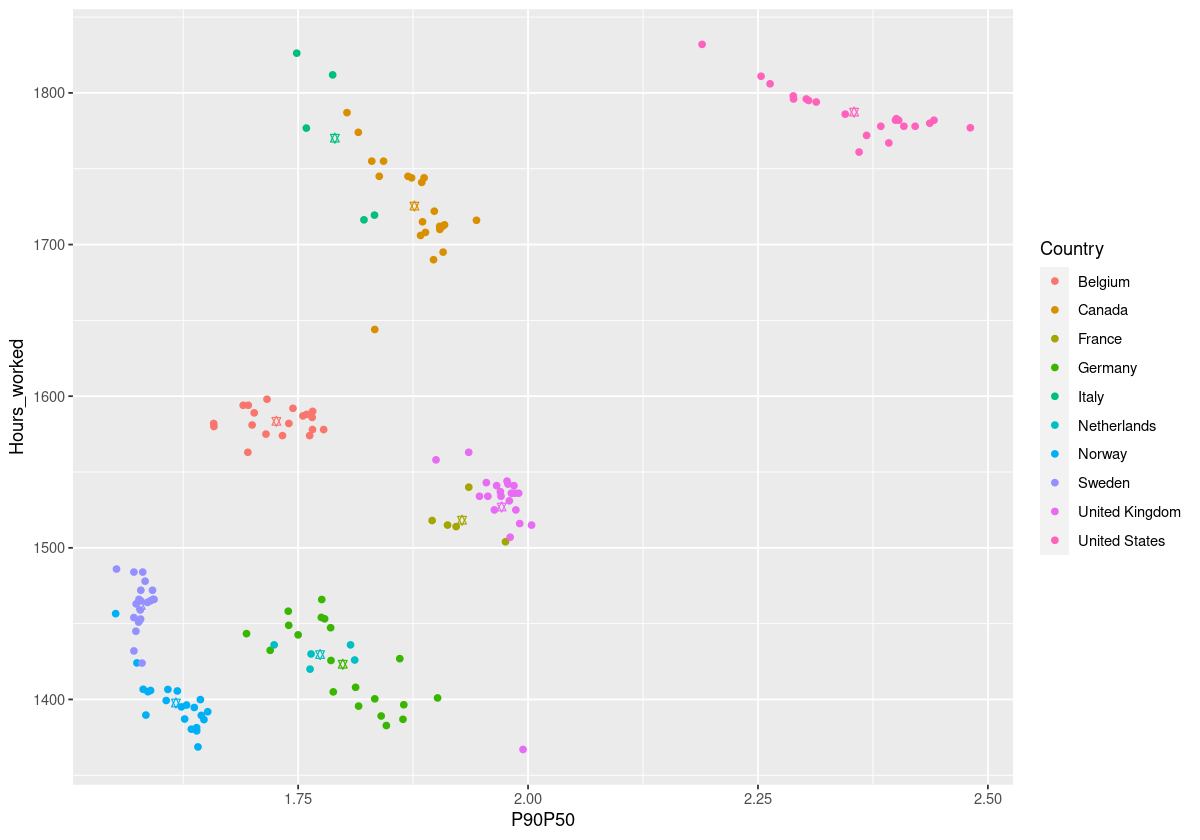

In [36]:
# Rename Country column
colnames(df_means)[1] = "Country"

# Plot inequality earning to working hours and country means
ggplot(data=df_all, aes(x=P90P50, y=Hours_worked)) +
    geom_point(aes(colour=Country)) +
    geom_point(data=df_means, aes(colour=Country), shape="star",
               show.legend = FALSE)

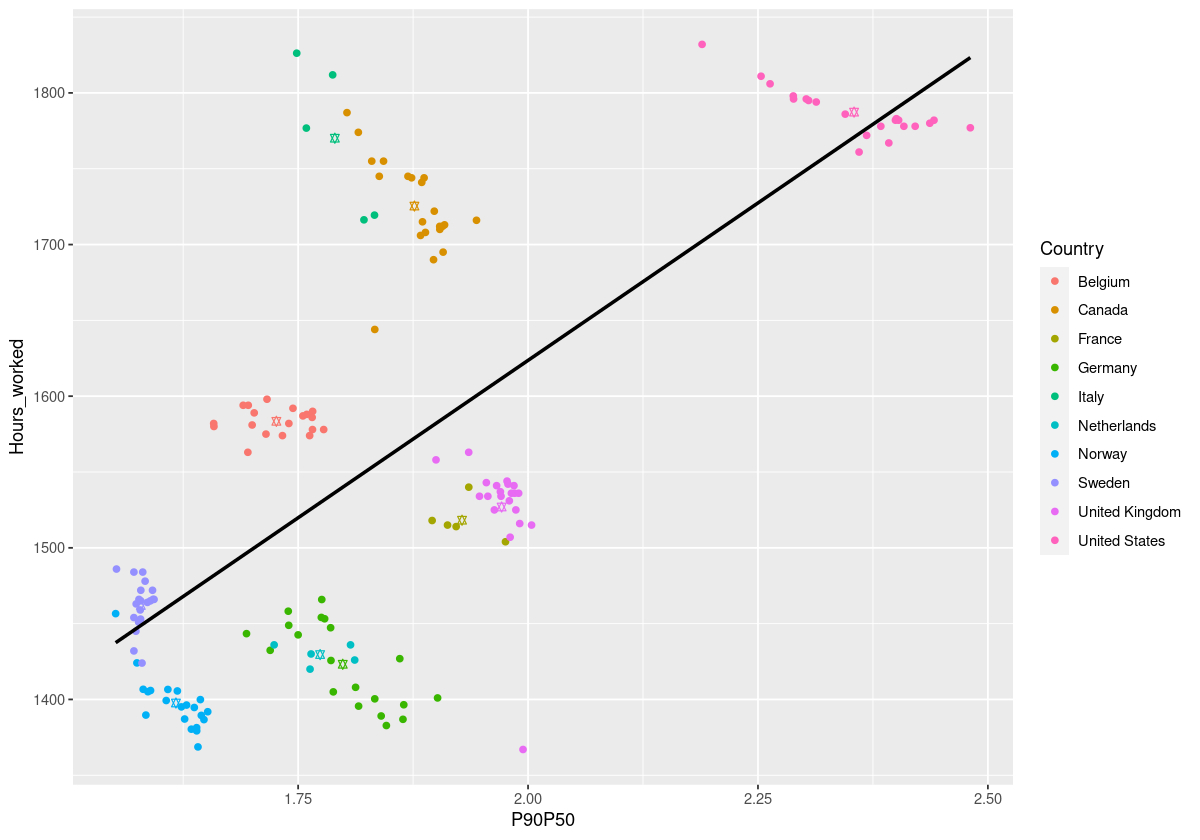

In [38]:
# Plot inequality earning to working hours and country means and linear 
# regression
ggplot(data=df_all, aes(x=P90P50, y=Hours_worked)) +
    geom_point(aes(colour=Country)) +
    geom_point(data=df_means, aes(colour=Country), shape="star",
               show.legend = FALSE) + 
    geom_smooth(method='lm', se=FALSE, color="black", formula = y ~ x)

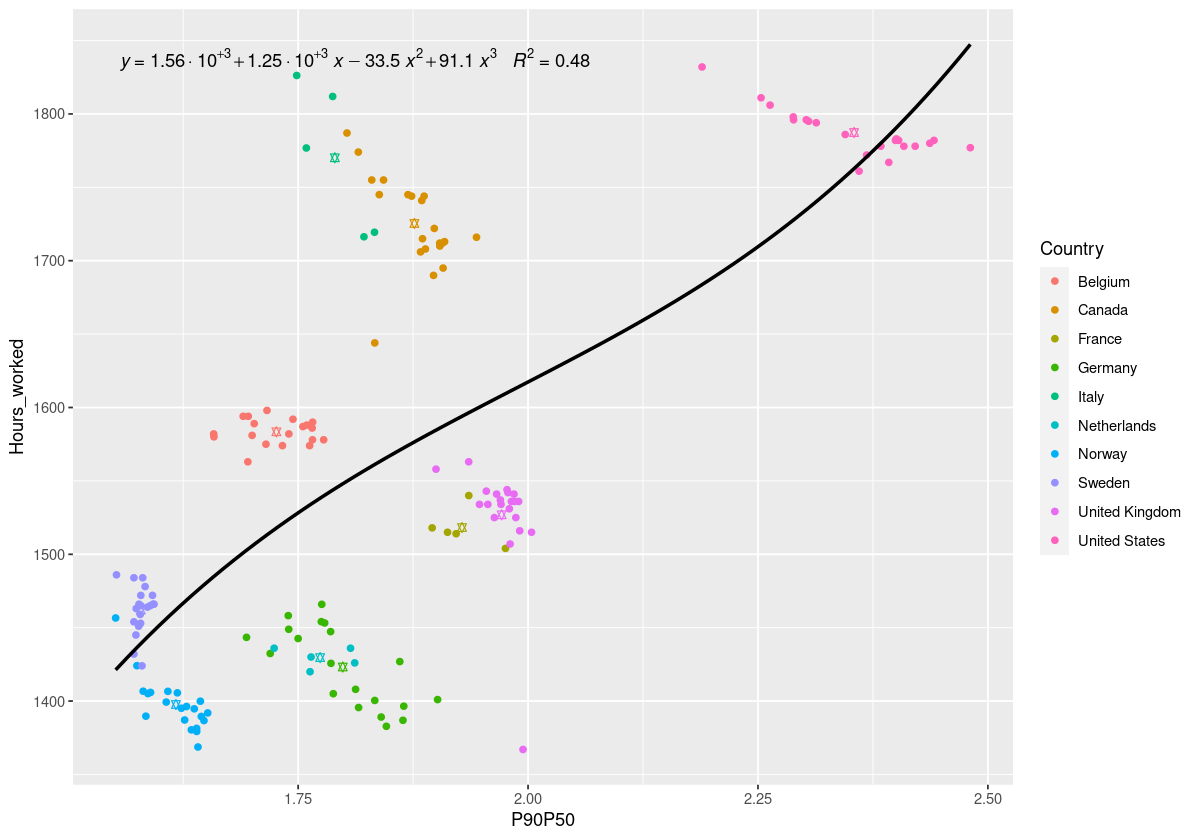

In [39]:
# Plot inequality earning to working hours and country means and polynomial 
# regression and R2 score
my.formula = y ~ poly(x, 3)
ggplot(data=df_all, aes(x=P90P50, y=Hours_worked)) +
    geom_point(aes(colour=Country)) +
    geom_point(data=df_means, aes(colour=Country), shape="star",
               show.legend = FALSE) + 
    geom_smooth(method='lm', se=FALSE, color="black", formula = my.formula) +
    stat_poly_eq(formula = my.formula, 
                 aes(label = paste(..eq.label.., ..rr.label.., sep = "~~~")), 
                 parse = TRUE)

# Table 1

In [40]:
# Get countries and country codes from hours worked dataset
df_countries <- read.csv("data_OECD/oecd_stat_hours_worked.csv", header = TRUE, sep = ",")[1:2]

# Remove all duplicate rows
df_countries <- df_countries[!duplicated(df_countries), ]

# Select rows for specific countries
df_countries <- df_countries[df_countries$Country %in% countries,]

# Drop levels
df_countries <- droplevels(df_countries)

# Remove row names
rownames(df_countries) <- NULL

# Show dataframe
df_countries

COUNTRY,Country
<fct>,<fct>
BEL,Belgium
CAN,Canada
FRA,France
DEU,Germany
ITA,Italy
NLD,Netherlands
NOR,Norway
SWE,Sweden
GBR,United Kingdom


In [41]:
# Reduce dataframe to specific countries and years
reduce_df <- function(df){
    
    # Select countries by code
    df <- df[df$LOCATION %in% df_countries$COUNTRY,]

    df
    # Selct specific columns
    df <- df[c('LOCATION', 'TIME', 'Value')]

    # Drop levels
    df <- droplevels(df)

    # Replace country code with country names
    levels(df$LOCATION) = countries
    
    # Rename columns
    colnames(df) = c('Country', 'Time', 'Value')
    
#     # Select years
    df <- df[df$Time %in% years,]
 
    return(df)
}

In [42]:
# Get dataframe with GDP
get_df_gdp <- function(){

    # Get data from https://data.oecd.org/ 
    url <- "https://stats.oecd.org/sdmx-json/data/DP_LIVE/.GDP.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en"
    df <- read.csv(url, header = TRUE, sep = ",")
    
    # Select USD per capita
    df <- df[df$MEASURE %in% c("USD_CAP"),]
    
    # Reduce dataframe
    df <- reduce_df(df)
    
    # Rename Value column
    colnames(df)[3] = 'GDP'

    return(df)
}

In [43]:
# Get dataframe with unemployment rate
get_df_unemploy <- function(){

    # Get data from https://data.oecd.org/ 
    url <- "https://stats.oecd.org/sdmx-json/data/DP_LIVE/.HUR.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en"
    df <- read.csv(url, header = TRUE, sep = ",")
    
    # Select total sex
    df <- df[df$SUBJECT %in% c("TOT"),]
    
    # Select annualy
    df <- df[df$FREQUENCY %in% c("A"),]
    
    # Reduce dataframe
    df <- reduce_df(df)
    
    # Rename Value column
    colnames(df)[3] = 'Unemployment_rate'

    return(df)
}

In [44]:
# Get GDP
df_gdp <- get_df_gdp()

In [45]:
# Get unemployment rate
df_unemploy <- get_df_unemploy()

In [46]:
# Create dataframe with all years and countries
df_all <- expand.grid(years, countries)

# Rearrange columns
df_all <- df_all[, c(2, 1)]

# Rename columns
colnames(df_all) = c("Country", "Time")

# Create column with country year comibnations
# df_all$CountryTimn <- paste(df_hours$Country, df_hours$Time)

# # Add all dataframe values
# for (df in list(df_hours)) {
#   df_all <- df[paste(df$Country, df$Time) %in% paste(
#     df_all$Country, df_all$Time), ]
# } 

# Create copy of df_hours
df_all <- cbind(df_hours)

# Iterate over all other dataframes
for (df in list(df_ratio, df_gdp, df_unemploy)) {
    
    # Remove all rows in df_all that not exist in df
    df_all <- df_all[paste(df_all$Country, df_all$Time) %in% paste(
        df$Country, df$Time), ]
    
    # Remove all rows in df that not exist in df_all
    df <- df[paste(df$Country, df$Time) %in% paste(
        df_all$Country, df_all$Time), ]
    
    # Combine df_all with the value column of df
    df_all <- cbind(df_all, df[3])
} 

# Show dataframe
df_all

,Country,Time,Hours_worked,P90P50,GDP,Unemployment_rate
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
145,Belgium,2000,1589,1.702233,27784.71,6.875000
146,Belgium,2001,1581,1.700000,28787.99,6.591667
147,Belgium,2002,1594,1.690265,30282.25,7.525000
148,Belgium,2003,1598,1.716149,30932.96,8.175000
149,Belgium,2004,1588,1.759412,32063.20,8.391666
150,Belgium,2005,1578,1.777778,33177.95,8.433333
151,Belgium,2006,1592,1.744380,35259.06,8.250000
152,Belgium,2007,1594,1.695775,36791.19,7.483333
153,Belgium,2008,1582,1.658189,37883.23,6.975000
